In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties, fontManager

# 1.中文显示问题

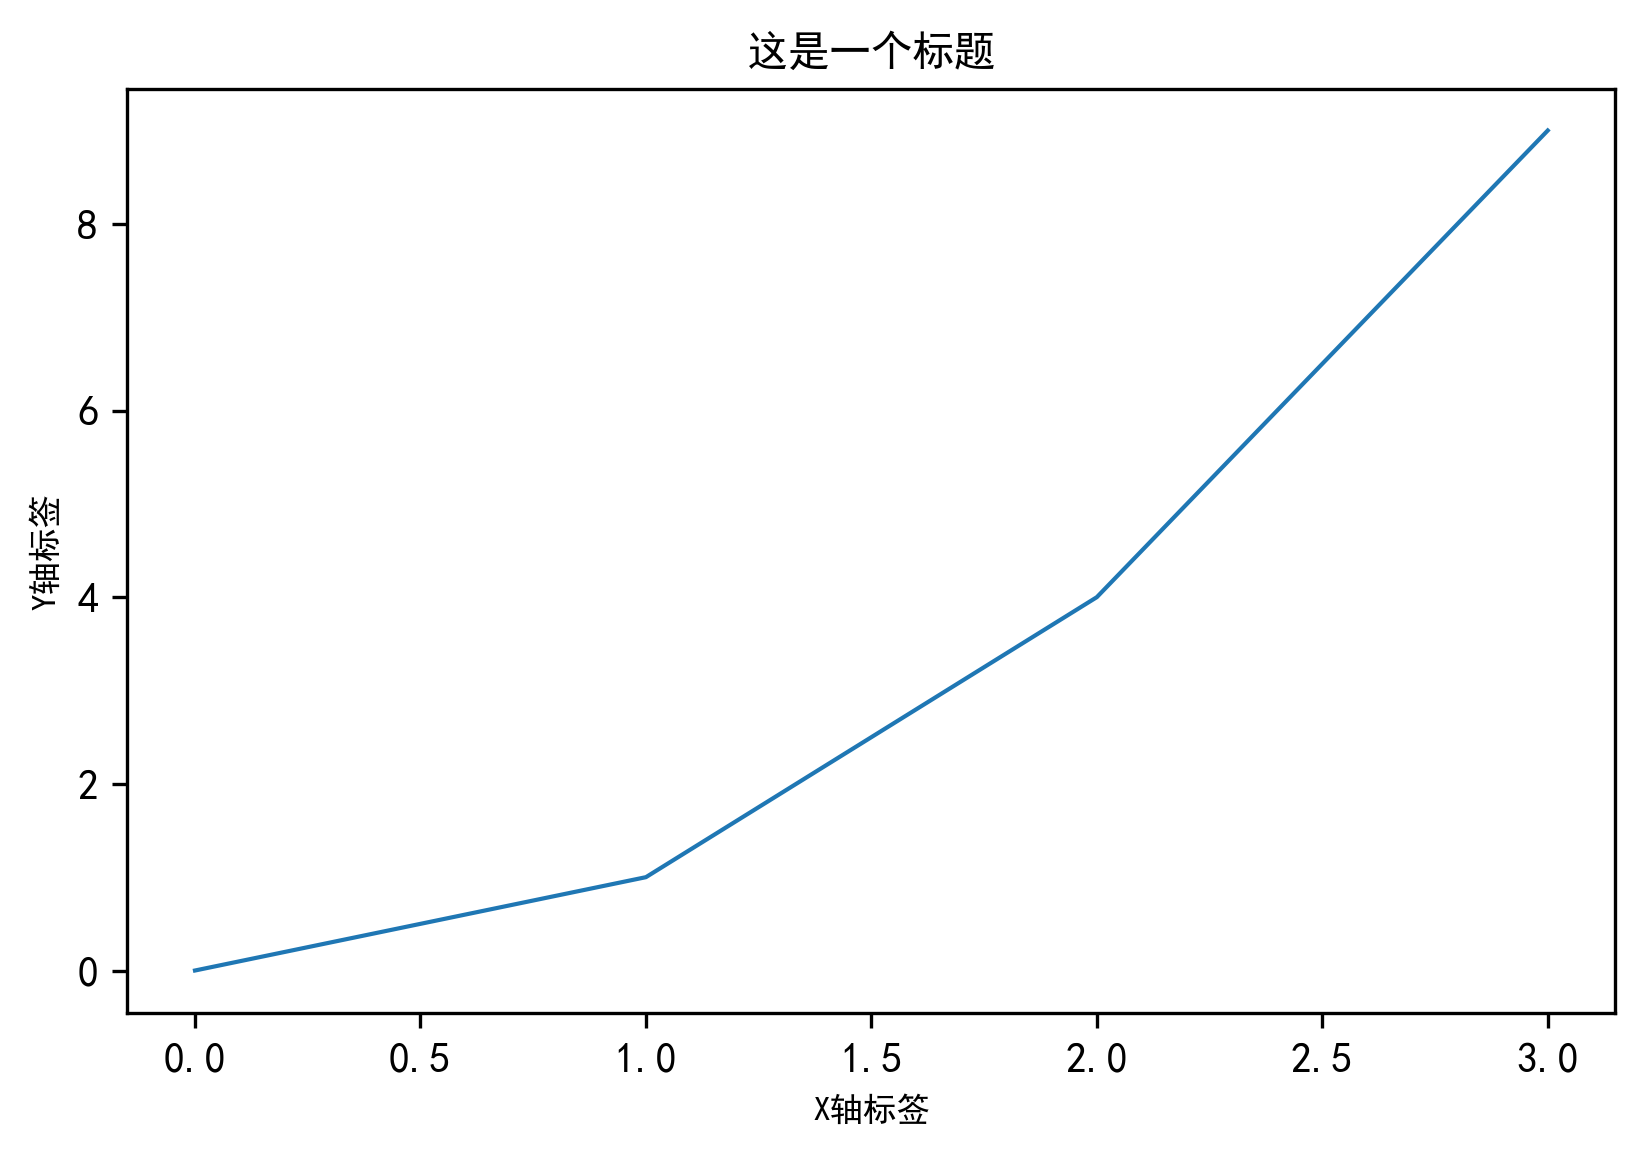

In [2]:
# 创建img目录(如果不存在)
if not os.path.exists('img'):
    os.makedirs('img')

# 设置字体文件的URL和本地保存路径
font_url = "https://github.com/caijihuize/Mushroom_Classification/raw/main/SimHei.ttf"  # 黑体字体文件的URL
font_name = "SimHei.ttf"  # 本地保存的字体文件名

# 如果字体文件不存在则下载
if not os.path.exists(font_name):
    # 使用requests下载字体文件
    response = requests.get(font_url)
    # 检查请求是否成功
    if response.status_code == 200:
        # 将内容写入文件
        with open(font_name, 'wb') as f:
            f.write(response.content)
    else:
        print(f"下载字体文件失败,状态码: {response.status_code}")

# 配置matplotlib的字体设置
fontManager.addfont(font_name)  # 将字体文件添加到matplotlib的字体管理器
font_prop = FontProperties(fname=font_name)  # 创建字体属性对象

# 设置全局字体配置
plt.rcParams['font.family'] = 'SimHei'  # 设置默认字体为黑体
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
plt.rcParams['font.size'] = 10  # 设置全局字体大小
plt.rcParams['axes.titlesize'] = 10  # 设置标题字体大小
plt.rcParams['axes.labelsize'] = 8  # 设置轴标签字体大小
plt.rcParams['figure.dpi'] = 300  # 设置图形DPI为300,提高显示清晰度
plt.rcParams['savefig.dpi'] = 600  # 设置保存图片的DPI为600,提高保存图片的清晰度

# 绘制测试图表验证中文显示
plt.figure(figsize=(6.4, 4))  # 设置图形大小
plt.title('这是一个标题', fontsize=10)  # 设置标题
plt.xlabel('X轴标签', fontsize=8)  # 设置X轴标签
plt.ylabel('Y轴标签', fontsize=8)  # 设置Y轴标签
plt.plot([0, 1, 2, 3], [0, 1, 4, 9], linewidth=1)  # 绘制简单的折线图,增加线宽提高清晰度

# 保存图表到img目录,使用更高质量的设置
plt.savefig('img/test_plot.png',
            bbox_inches='tight',  # 自动调整边界
            format='png',  # 使用PNG格式保存
            facecolor='white',  # 设置白色背景
            edgecolor='none',  # 无边框
            transparent=False)  # 不透明
plt.show()  # 显示图表

# 2.绘制数据集的各种类的图片数量对比柱状图

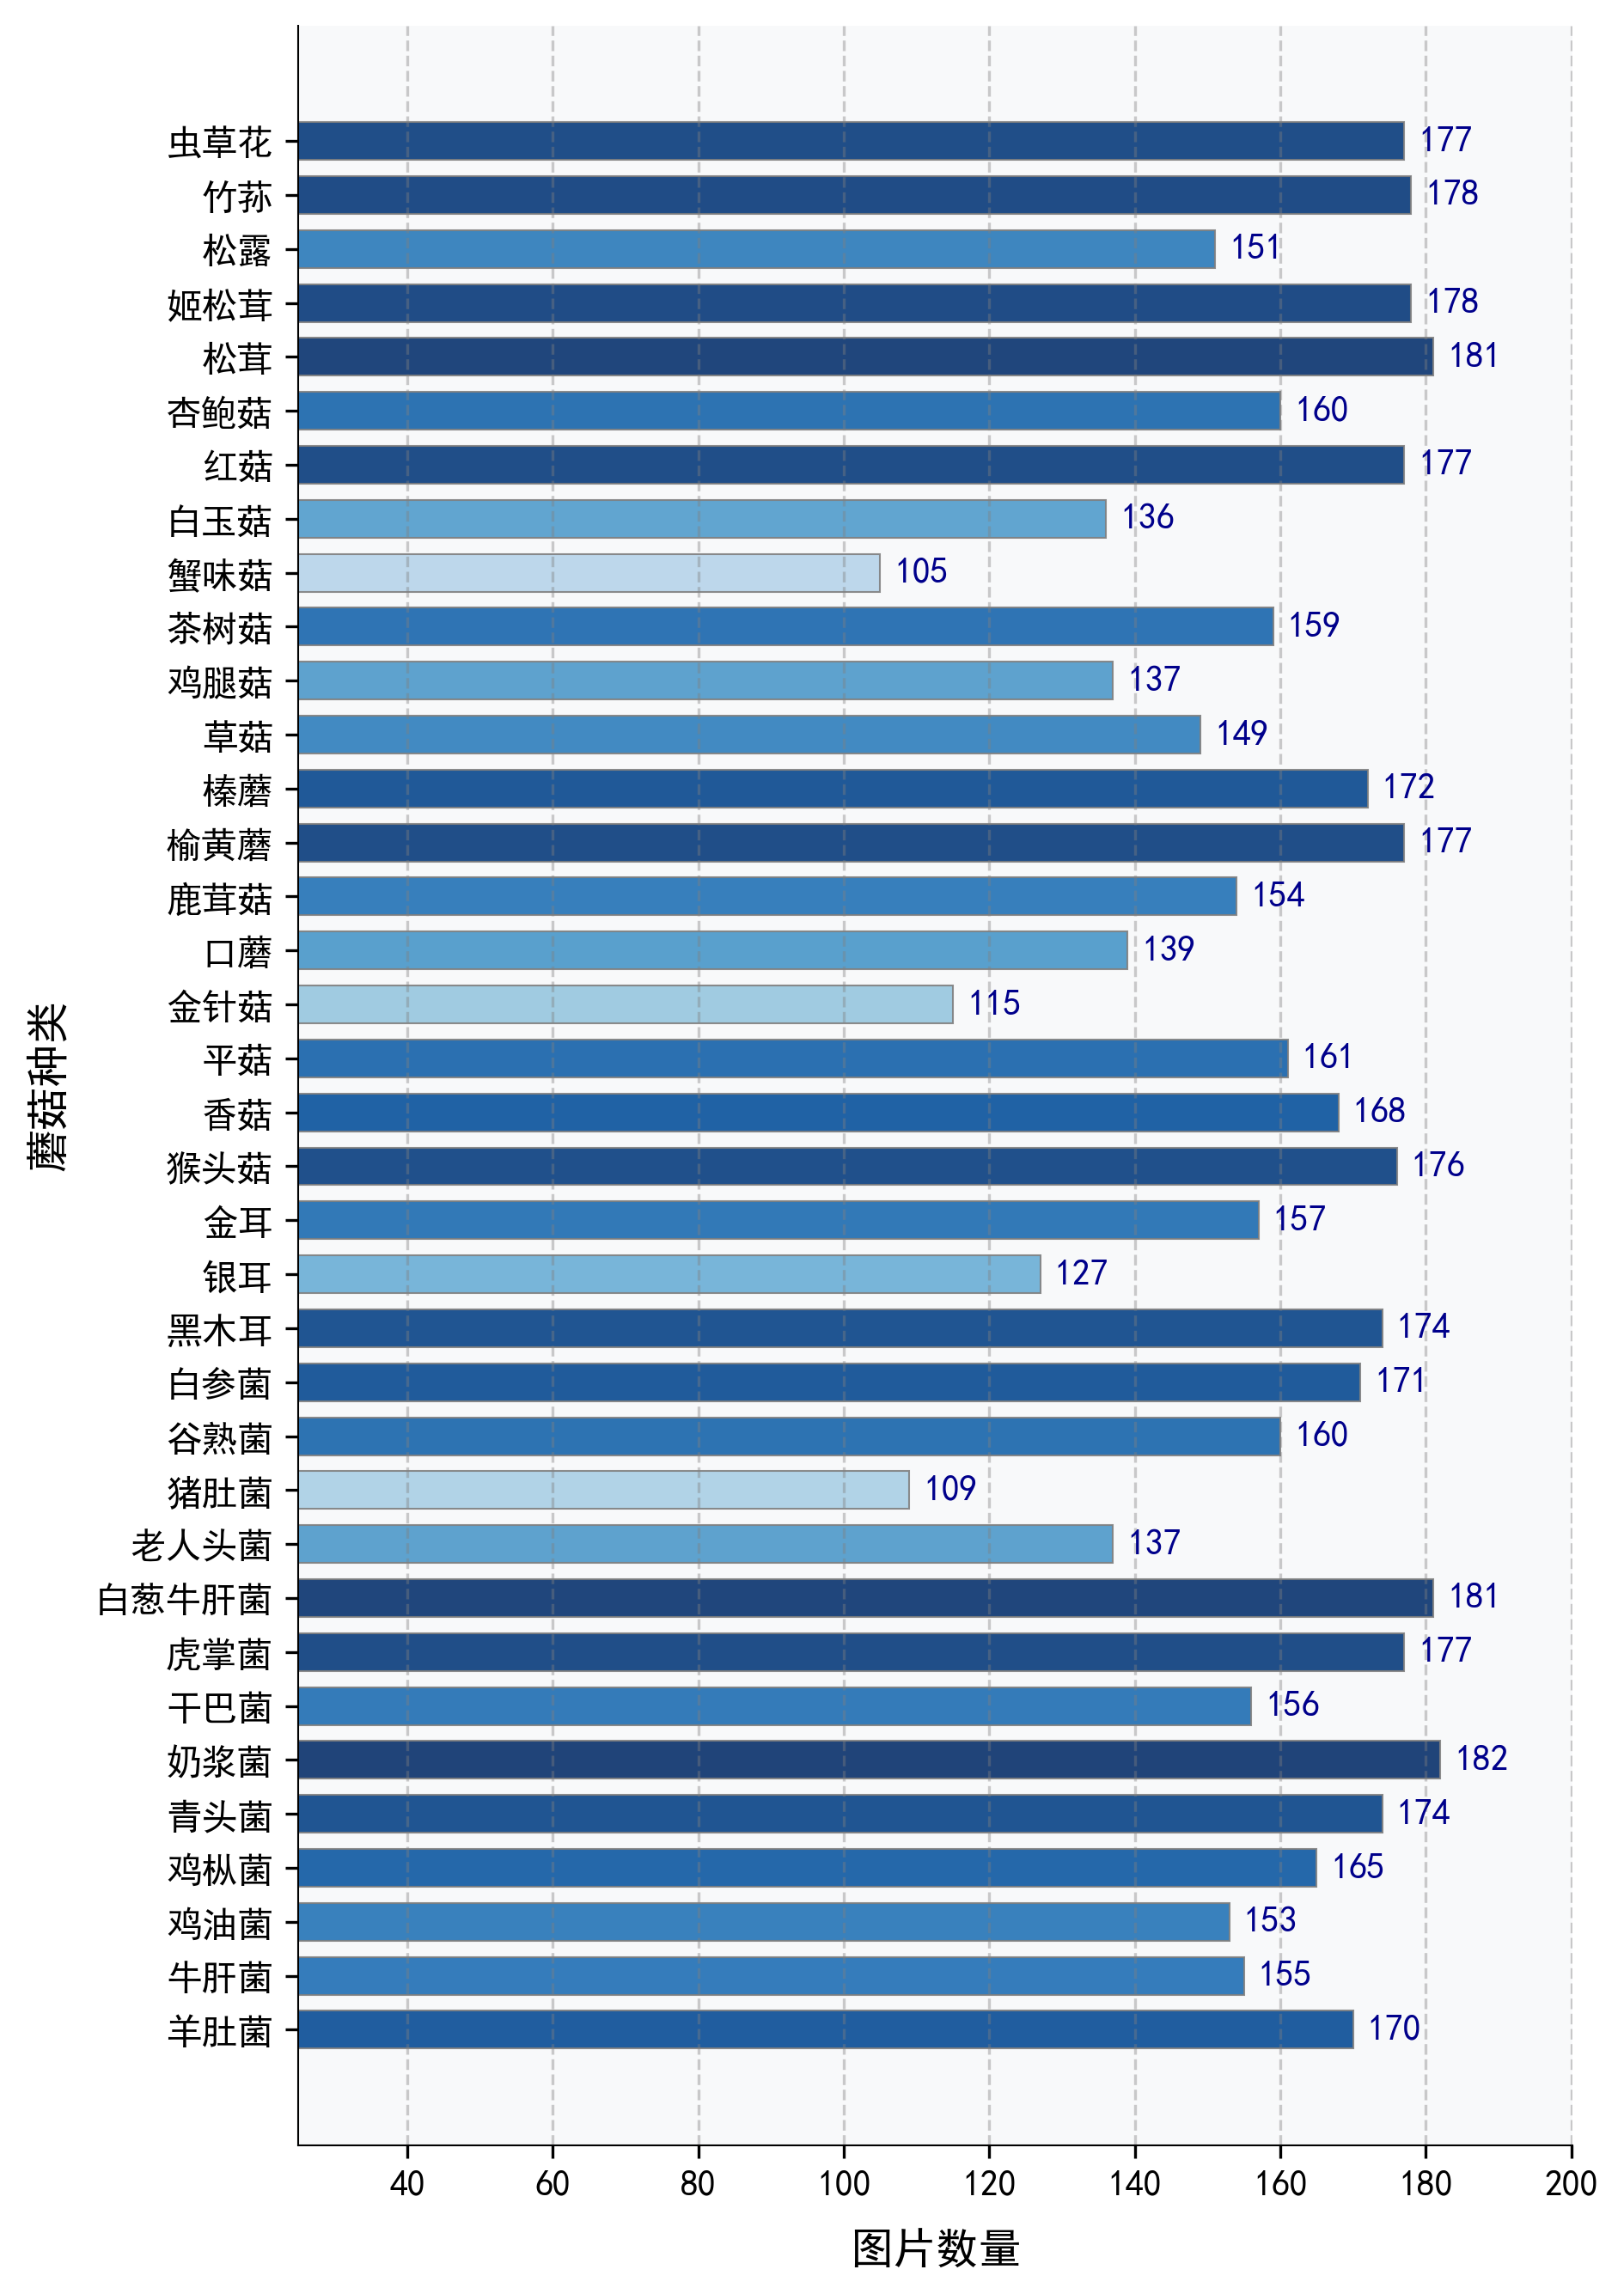

In [8]:
# 读取csv文件中的数据
import pandas as pd

# 读取csv文件
category_counts = pd.read_csv('csv/category_counts.csv', index_col=0)

# 准备数据
categories_readable = category_counts.index.tolist()
counts = category_counts['图片数量'].tolist()

# 创建一个新的图形
plt.figure(figsize=(6.4, 9))

# 创建颜色渐变
count_category_pairs = list(zip(counts, categories_readable))
count_category_pairs.sort(key=lambda x: x[0])
sorted_categories = [pair[1] for pair in count_category_pairs]
sorted_counts = [pair[0] for pair in count_category_pairs]

# 创建颜色映射
norm = plt.Normalize(min(counts), max(counts))
colors = plt.cm.Blues(norm(counts) * 0.7 + 0.3)

# 绘制水平柱状图
bars = plt.barh(categories_readable, counts, color=colors, height=0.7,
                edgecolor='gray', linewidth=0.5, alpha=0.9)

# 添加数值标签
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 2, bar.get_y() + bar.get_height()/2, f'{int(width)}',
             va='center', ha='left', fontsize=10, fontweight='bold',
             color='darkblue')

# 设置图表标题和轴标签
plt.xlabel('图片数量', fontsize=12, labelpad=8)
plt.ylabel('蘑菇种类', fontsize=12, labelpad=8)

# 设置坐标轴样式
plt.tick_params(axis='both', which='major', labelsize=10)
plt.xlim(25, max(counts) + max(counts)*0.1)

# 添加网格线
plt.grid(axis='x', linestyle='--', alpha=0.4, color='gray')

# 添加背景色
plt.gca().set_facecolor('#f8f9fa')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)

# 自动调整布局
plt.tight_layout()

# 保存图表
plt.savefig('img/mushroom_distribution.png',
            bbox_inches='tight',
            dpi=800,
            facecolor='#f8f9fa')

# 显示图形
plt.show()

# 3.绘制训练集和测试集的各种类图片数量对比柱状图

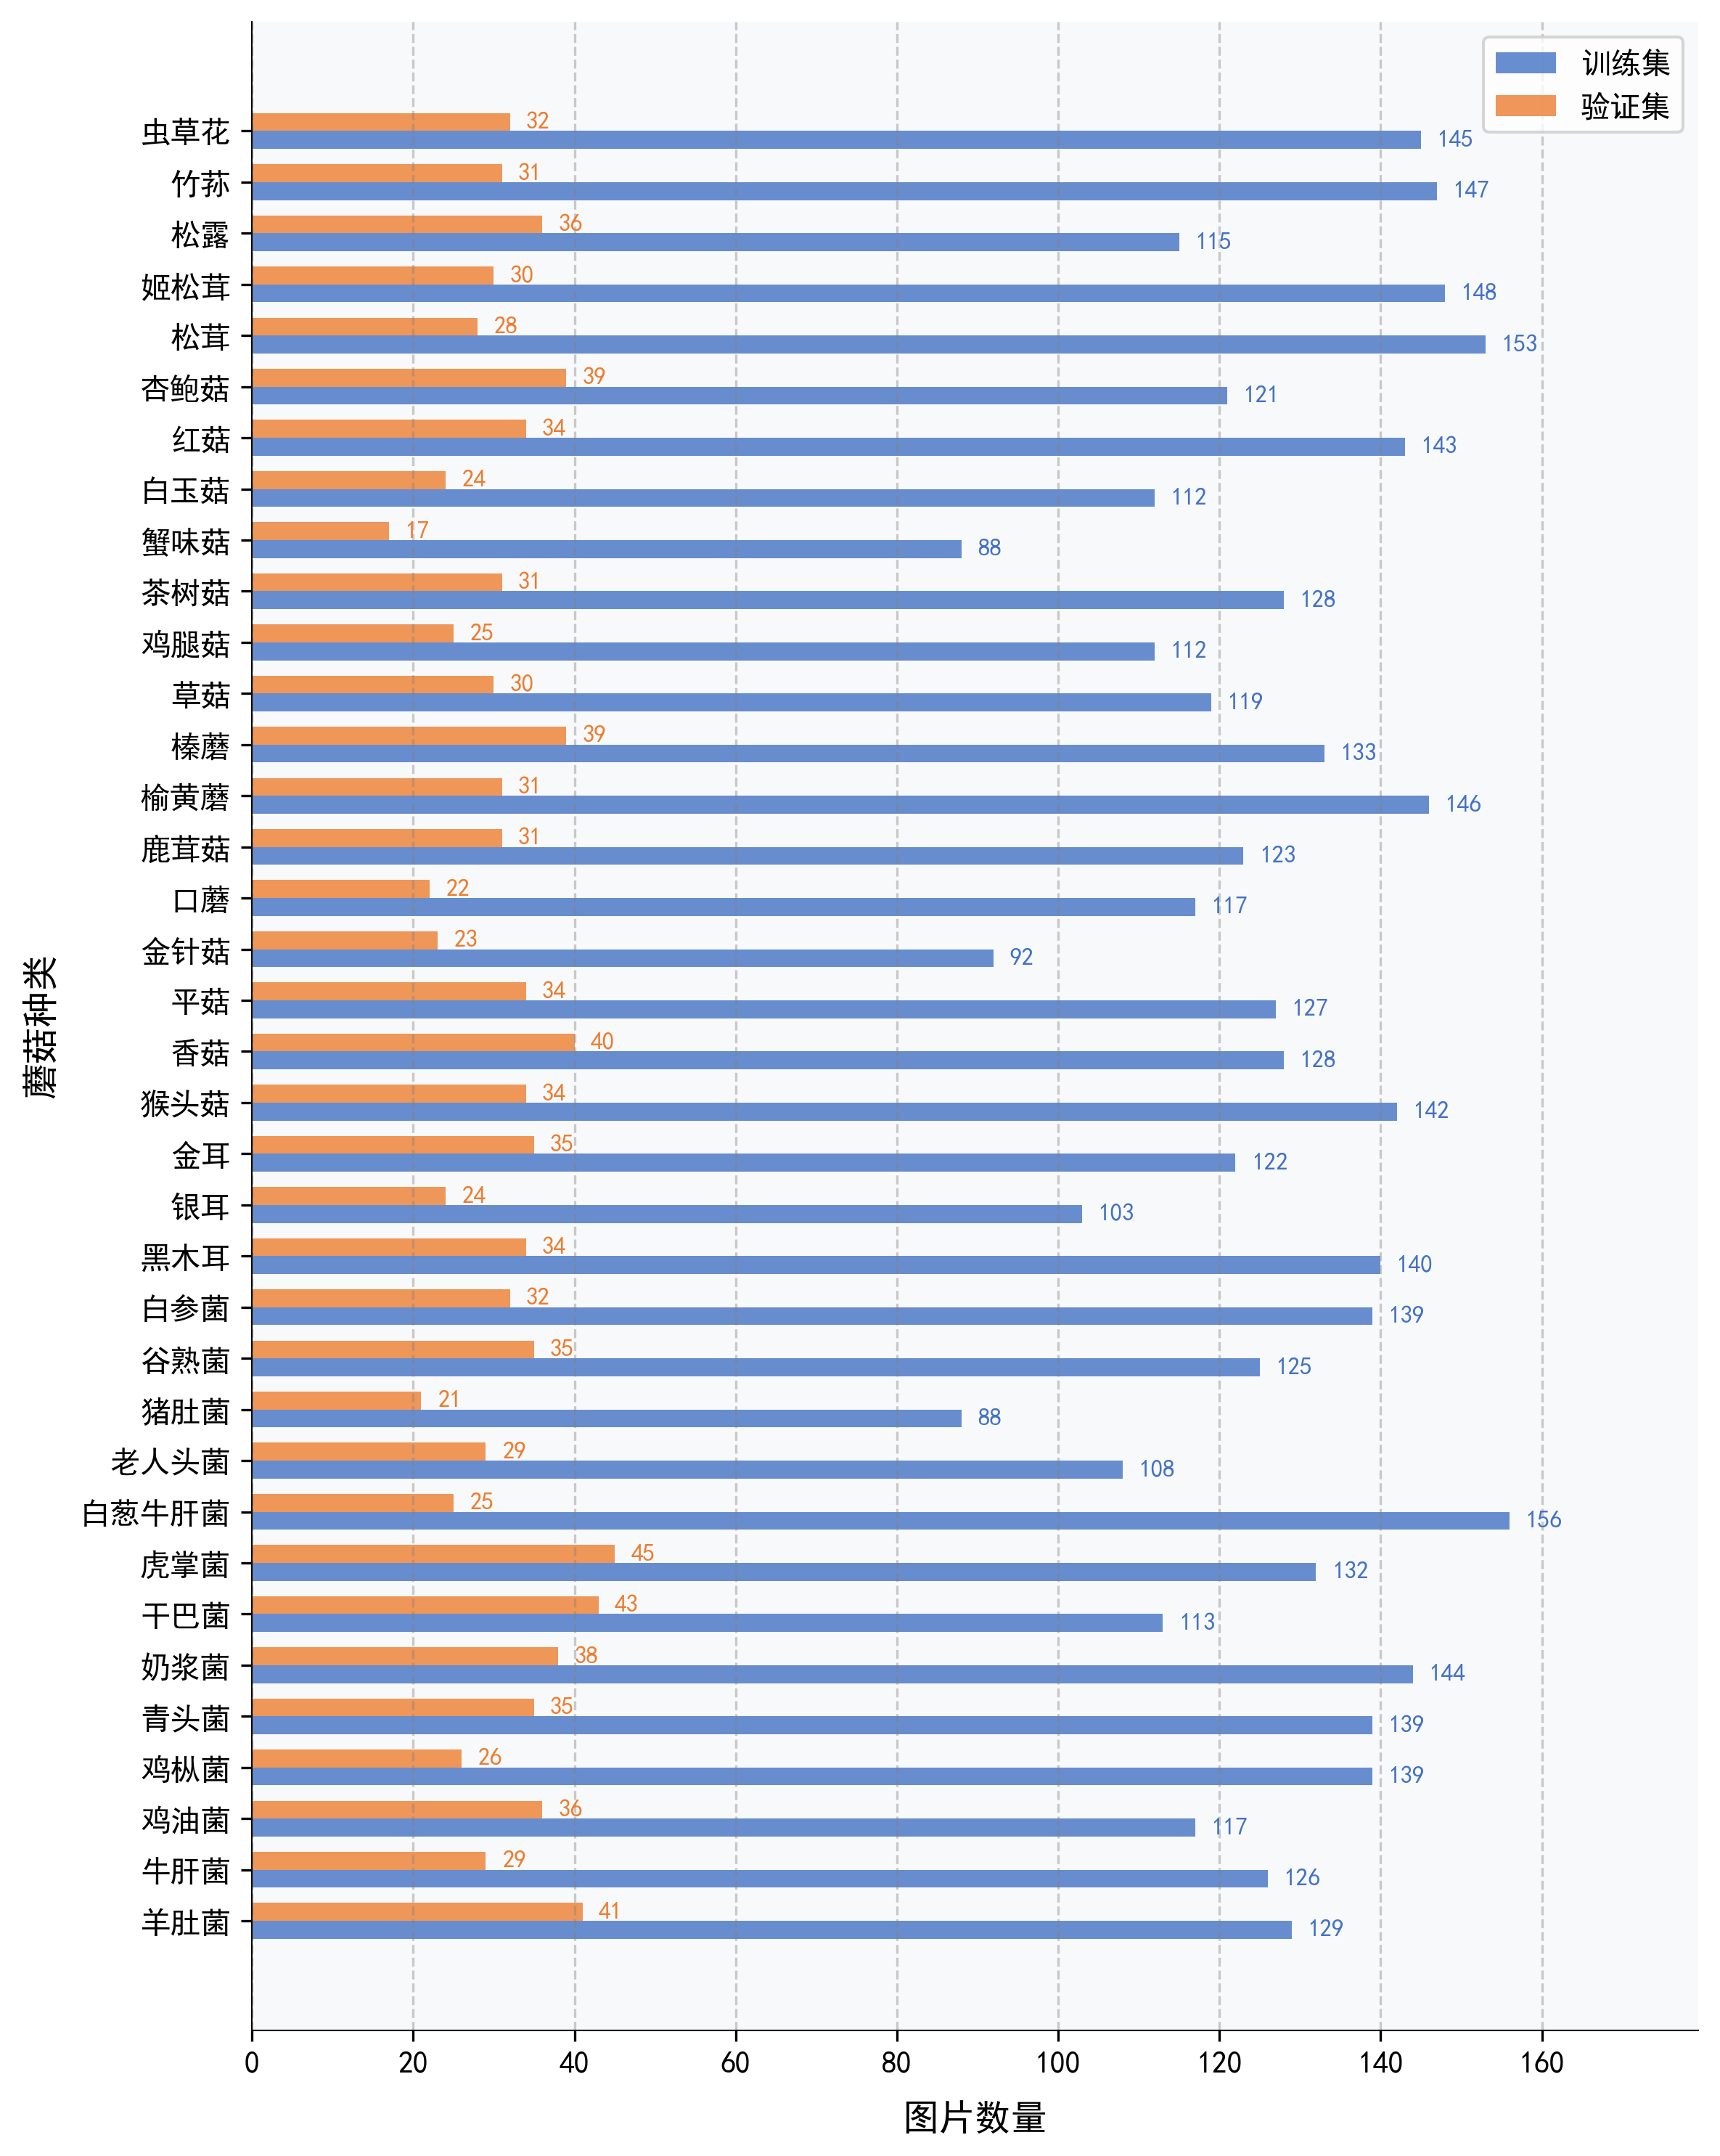

In [6]:
# 创建训练集和验证集类别分布的对比柱状图

# 读取csv文件
train_val_counts = pd.read_csv('csv/train_val_counts.csv')

# 准备数据
categories_names = train_val_counts['蘑菇种类'].tolist()  # 获取所有蘑菇种类名称
train_counts = train_val_counts['训练集数量'].tolist()  # 训练集中各类别数量
validation_counts = train_val_counts['验证集数量'].tolist()  # 验证集中各类别数量

# 设置图形大小
plt.figure(figsize=(8, 10))

# 设置柱状图的位置
x = np.arange(len(categories_names))
width = 0.35  # 柱子的宽度

# 绘制训练集和验证集的柱状图
bars1 = plt.barh(x - width/2, train_counts, width, label='训练集', color='#4472C4', alpha=0.8)
bars2 = plt.barh(x + width/2, validation_counts, width, label='验证集', color='#ED7D31', alpha=0.8)

# 添加数值标签
for i, bar in enumerate(bars1):
    width = bar.get_width()
    plt.text(width + 2, bar.get_y() + bar.get_height()/2, f'{int(width)}',
             va='center', ha='left', fontsize=8, color='#4472C4')

for i, bar in enumerate(bars2):
    width = bar.get_width()
    plt.text(width + 2, bar.get_y() + bar.get_height()/2, f'{int(width)}',
             va='center', ha='left', fontsize=8, color='#ED7D31')

# 设置图表标题和轴标签
plt.xlabel('图片数量', fontsize=12, labelpad=8)
plt.ylabel('蘑菇种类', fontsize=12, labelpad=8)
plt.yticks(x, categories_names, fontsize=10)

# 添加图例
plt.legend(loc='upper right', fontsize=10)

# 设置坐标轴样式
plt.tick_params(axis='x', which='major', labelsize=10)
plt.xlim(0, max(max(train_counts), max(validation_counts)) * 1.15)  # 设置x轴范围，留出更多空间

# 添加网格线
plt.grid(axis='x', linestyle='--', alpha=0.4, color='gray')

# 添加背景色和边框样式
plt.gca().set_facecolor('#f8f9fa')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)

# 添加标题
#plt.title('训练集与验证集各类别图像数量对比', fontsize=14, pad=15)

# 自动调整布局
plt.tight_layout()

# 保存图表
plt.savefig('img/train_validation_comparison.png',
            bbox_inches='tight',
            dpi=800,
            facecolor='#f8f9fa')

# 显示图形
plt.show()

# 4.绘制训练历史曲线图

In [ ]:
# 合并所有模型的训练历史数据并可视化比较

# 读取所有保存的模型历史
models = {
    'MobileNetV1': pd.read_csv('csv/mobilenetv1_history.csv'),
    'MobileNetV2': pd.read_csv('csv/history_MobileNetV2.csv'),
    'EfficientNetB0': pd.read_csv('csv/history_EfficientNetB0.csv'),
    'ResNet101': pd.read_csv('csv/history_ResNet101.csv')
}




# 设置全局样式参数
TITLE_SIZE = 12
LABEL_SIZE = 10
LEGEND_SIZE = 10
LINE_WIDTH = 1
FIG_SIZE = (6.4, 4)
DPI = 600
TICK_SIZE = 8  # 新增坐标轴刻度文字大小参数

In [ ]:
# 绘制训练准确率对比
plt.figure(figsize=FIG_SIZE, dpi=DPI)
plt.plot(history_MobileNetV1.history['accuracy'], label='MobileNetV1', linewidth=LINE_WIDTH)
plt.plot(history_MobileNetV2.history['accuracy'], label='MobileNetV2', linewidth=LINE_WIDTH)
plt.plot(history_EfficientNetB0.history['accuracy'], label='EfficientNetB0', linewidth=LINE_WIDTH)
plt.plot(history_ResNet101.history['accuracy'], label='ResNet101', linewidth=LINE_WIDTH)
#plt.title('训练准确率对比', fontsize=TITLE_SIZE, pad=15, fontweight='bold')
plt.xlabel('轮次', fontsize=LABEL_SIZE)
plt.ylabel('准确率', fontsize=LABEL_SIZE)
plt.legend(fontsize=LEGEND_SIZE, loc='lower right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tick_params(labelsize=TICK_SIZE)  # 修改坐标轴刻度文字大小
plt.savefig('img/training_accuracy.png', dpi=DPI, bbox_inches='tight')
plt.show()

In [ ]:
# 绘制验证准确率对比
plt.figure(figsize=FIG_SIZE, dpi=DPI)
plt.plot(history_MobileNetV1.history['val_accuracy'], label='MobileNetV1', linewidth=LINE_WIDTH)
plt.plot(history_MobileNetV2.history['val_accuracy'], label='MobileNetV2', linewidth=LINE_WIDTH)
plt.plot(history_EfficientNetB0.history['val_accuracy'], label='EfficientNetB0', linewidth=LINE_WIDTH)
plt.plot(history_ResNet101.history['val_accuracy'], label='ResNet101', linewidth=LINE_WIDTH)
#plt.title('验证准确率对比', fontsize=TITLE_SIZE, pad=15, fontweight='bold')
plt.xlabel('轮次', fontsize=LABEL_SIZE)
plt.ylabel('准确率', fontsize=LABEL_SIZE)
plt.legend(fontsize=LEGEND_SIZE, loc='lower right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tick_params(labelsize=TICK_SIZE)  # 修改坐标轴刻度文字大小
plt.savefig('img/validation_accuracy.png', dpi=DPI, bbox_inches='tight')
plt.show()

In [ ]:
# 绘制训练损失对比
plt.figure(figsize=FIG_SIZE, dpi=DPI)
plt.plot(history_MobileNetV1.history['loss'], label='MobileNetV1', linewidth=LINE_WIDTH)
plt.plot(history_MobileNetV2.history['loss'], label='MobileNetV2', linewidth=LINE_WIDTH)
plt.plot(history_EfficientNetB0.history['loss'], label='EfficientNetB0', linewidth=LINE_WIDTH)
plt.plot(history_ResNet101.history['loss'], label='ResNet101', linewidth=LINE_WIDTH)
#plt.title('训练损失对比', fontsize=TITLE_SIZE, pad=15, fontweight='bold')
plt.xlabel('轮次', fontsize=LABEL_SIZE)
plt.ylabel('损失', fontsize=LABEL_SIZE)
plt.legend(fontsize=LEGEND_SIZE, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tick_params(labelsize=TICK_SIZE)  # 修改坐标轴刻度文字大小
plt.savefig('img/training_loss.png', dpi=DPI, bbox_inches='tight')
plt.show()

In [ ]:
# 绘制验证损失对比
plt.figure(figsize=FIG_SIZE, dpi=DPI)
plt.plot(history_MobileNetV1.history['val_loss'], label='MobileNetV1', linewidth=LINE_WIDTH)
plt.plot(history_MobileNetV2.history['val_loss'], label='MobileNetV2', linewidth=LINE_WIDTH)
plt.plot(history_EfficientNetB0.history['val_loss'], label='EfficientNetB0', linewidth=LINE_WIDTH)
plt.plot(history_ResNet101.history['val_loss'], label='ResNet101', linewidth=LINE_WIDTH)
#plt.title('验证损失对比', fontsize=TITLE_SIZE, pad=15, fontweight='bold')
plt.xlabel('轮次', fontsize=LABEL_SIZE)
plt.ylabel('损失', fontsize=LABEL_SIZE)
plt.legend(fontsize=LEGEND_SIZE, loc='upper right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tick_params(labelsize=TICK_SIZE)  # 修改坐标轴刻度文字大小
plt.savefig('img/validation_loss.png', dpi=DPI, bbox_inches='tight')
plt.show()